# Use Historical NOAA Bouy Data to forecast waves

## San Francisco local bouys 

cali = CALIFORNIA - 357NM West of San Francisco, CA. Station ID: 46059

bb = BODEGA BAY - 48NM North Northwest of San Francisco, CA.Station ID: 46013

sf = SAN FRANCISCO - 18NM West of San Francisco, CA. Station ID: 46026

hmb = HALF MOON BAY - 24NM South Southwest of San Francisco, CA Station ID: 46012


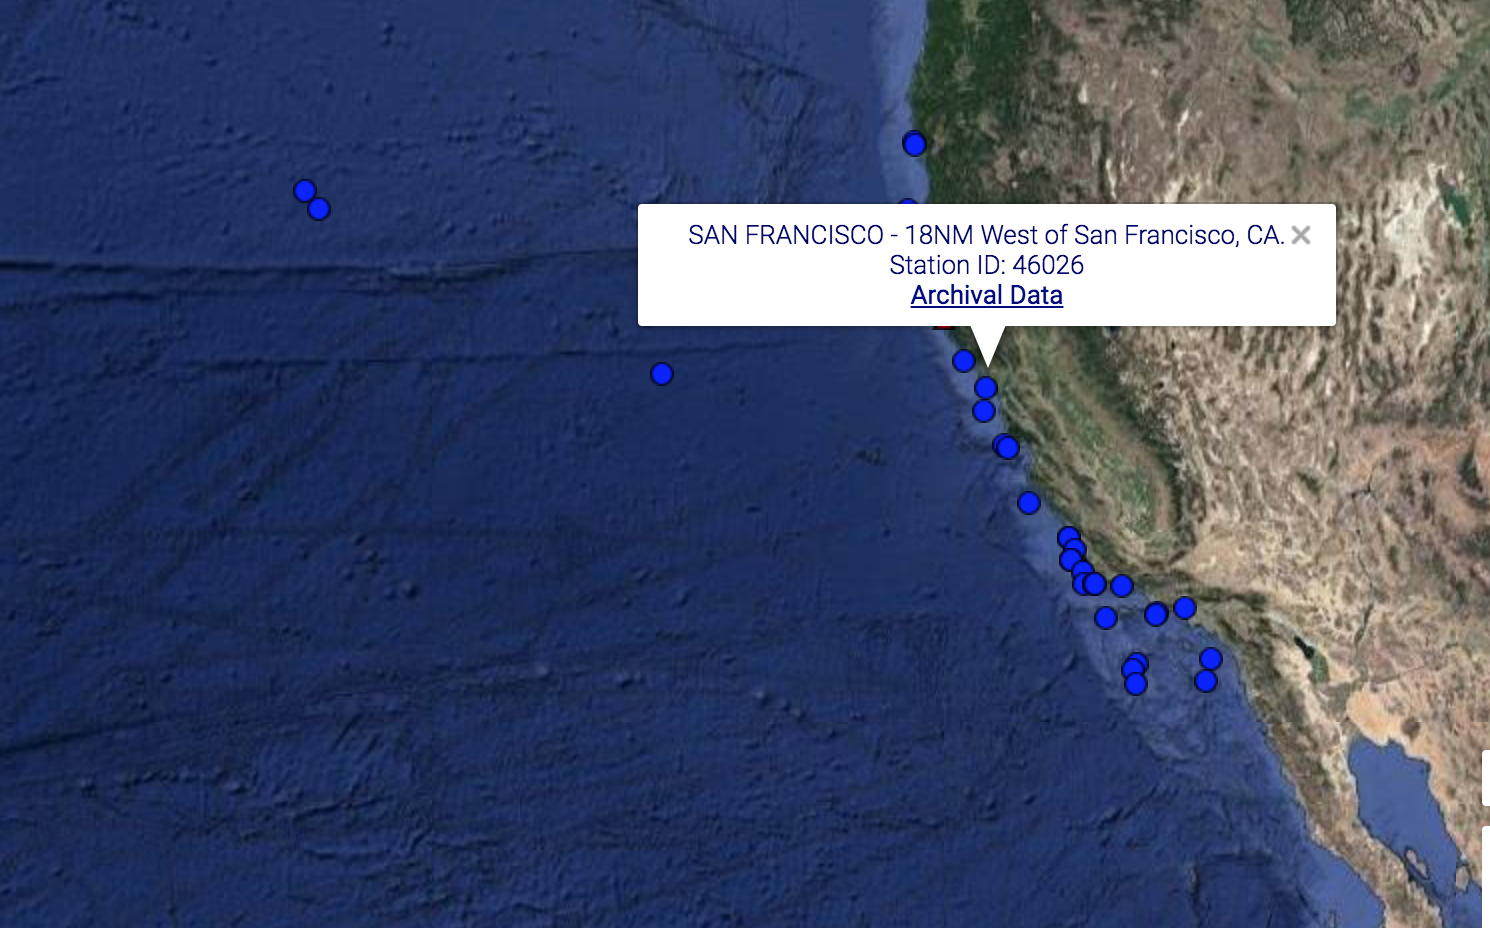

# Gathering local wave and weather data from National Oceananic and Atmospheric Administraiton bouys. 

[Historical Bouy data](http://www.ndbc.noaa.gov/historical_data.shtml)

[Measurement descriptions](http://www.ndbc.noaa.gov/measdes.shtml#stdmet)

[Map of all available Bouys](https://www.nodc.noaa.gov/BUOY/)

## Bouy file syntax
xxxxxtyyyy

xxxxx=Bouy ID number

t=data type 

yyyy= year

## Data type 
h= Standard Meterological

c= Continuous Winds

a= Ocean Current Data

o= Oceanographic Data

w=Spectral wave density

d= Spectral wave (alpha1) direction data

i= Spectral wave (alpha2) direction data

j= Spectral wave (r1) direction data

k= Spectral wave (r2) direction data

t= Water-column Height (Tsunameters using DART® technology)


In [1]:
import numpy
import netCDF4
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

### Get wave data 

In [2]:
#2015 SF data
url='http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h2015.txt.gz&dir=data/historical/stdmet/'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
sf_2015 = pd.read_fwf(url, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])

In [3]:
#2016 SF data
url='http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h2016.txt.gz&dir=data/historical/stdmet/'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
sf_2016 = pd.read_fwf(url, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])

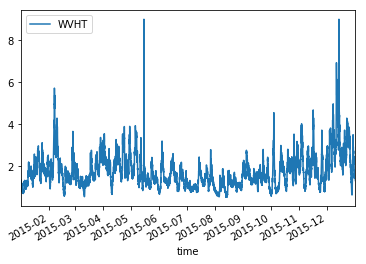

In [4]:
sf_2015.plot(x='time',y='WVHT')

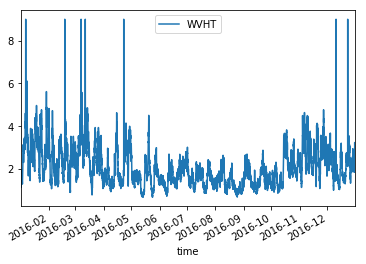

In [5]:
sf_2016.plot(x='time',y='WVHT')

In [ ]:
url='http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h2015.txt.gz&dir=data/historical/stdmet/'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
bouy_data = []
for y in range(2014,2015):
    path = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h'+str(y)+'.txt.gz&dir=data/historical/stdmet/'
    df = pd.read_fwf(path, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])
    bouy_data.append(df)

In [8]:
sf_bouy_data.tail()

,time,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
8247,2014-12-31 18:50:00,190,1.2,1.8,0.93,12.9,4.58,275,1024.3,10.9,13.1,999.0,99.0,99.0
8248,2014-12-31 19:50:00,247,2.8,3.4,0.93,12.9,4.82,292,1023.4,10.9,13.3,999.0,99.0,99.0
8249,2014-12-31 20:50:00,257,1.8,3.4,0.89,12.9,5.06,264,1021.7,11.3,13.4,999.0,99.0,99.0
8250,2014-12-31 21:50:00,301,3.3,4.3,0.80,12.9,5.42,272,1020.8,11.9,13.5,999.0,99.0,99.0
8251,2014-12-31 22:50:00,315,5.2,6.4,0.79,12.9,5.86,293,1020.4,12.4,13.6,999.0,99.0,99.0


In [9]:
y='2016'
dateparse = lambda x: pd.datetime.strptime(x, '%Y'+' '+'%m'+' '+'%d'+' '+'%H'+' '+'%M')
path = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=46026h'+str(y)+'.txt.gz&dir=data/historical/stdmet/'
sf_bouy_data = pd.read_fwf(path, parse_dates={'time': ['#YY', 'MM' , 'DD' , 'hh' , 'mm']}, date_parser=dateparse, skiprows=[1,2])

In [10]:
sf_bouy_data.tail()

,time,WDIR WSPD GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
8649,2016-12-31 18:50:00,80 6.7 8.7,2.42,11.43,7.75,303,1014.1,9.2,10.7,999.0,99.0,99.0
8650,2016-12-31 19:50:00,73 7.8 9.4,2.37,12.12,7.50,287,1014.0,9.6,10.8,999.0,99.0,99.0
8651,2016-12-31 20:50:00,59 7.1 8.6,2.44,12.90,7.66,285,1013.8,9.6,10.8,999.0,99.0,99.0
8652,2016-12-31 21:50:00,69 5.2 6.4,2.29,12.90,8.18,285,1013.4,9.5,10.8,999.0,99.0,99.0
8653,2016-12-31 22:50:00,43 3.0 3.7,2.25,13.79,8.48,277,1013.9,9.8,10.8,999.0,99.0,99.0
